In [1]:
# import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 
plt.style.use('seaborn')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### Project outline  
The goal of my project is to perform a few tasks:   

1. Analyze shopper behaviors (and maybe segmentation?)   
2. Create shopping cart recommendation system for return customers (and maybe product bundles for profit maximization?)   
3. Predict whether the customer would like to re-order an item that they have purchased before for their next purchase.   
4. Flask app and demo that could show different product recommendation using different user accounts to sign in.   

Priority of task: 1 > 2 > 4 > 3

### Dataset background   
Instacart public dataset released in 2017 (https://www.instacart.com/datasets/grocery-shopping-2017)  
In Instacart medium post, they provided more info about the dataset and motivation on why Instacart released the dataset    (https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2).   

The dataset has more than 3M grocery orders for more than 200k Instacart customers.   

Data Dictionary could be found at https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b.   

In [2]:
aisles = pd.read_csv('C:/Users/User/Documents/Data Science Personal Project/instacart/data/aisles.csv')
departments = pd.read_csv('C:/Users/User/Documents/Data Science Personal Project/instacart/data/departments.csv')
order_products_prior = pd.read_csv('C:/Users/User/Documents/Data Science Personal Project/instacart/data/order_products__prior.csv')
order_products_train = pd.read_csv('C:/Users/User/Documents/Data Science Personal Project/instacart/data/order_products__train.csv')
orders = pd.read_csv('C:/Users/User/Documents/Data Science Personal Project/instacart/data/orders.csv')
products = pd.read_csv('C:/Users/User/Documents/Data Science Personal Project/instacart/data/products.csv')

### A peak of each csv

#### aisles

In [3]:
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
# there are 134 different aisles
# with unique aisle id and aisle name
aisles.shape

(134, 2)

In [5]:
aisles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


### departments

In [6]:
departments.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# there are 21 different unique department 
departments.shape

(21, 2)

### order_products_prior

In [8]:
order_products_prior.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
order_products_prior.shape


(32434489, 4)

In [10]:
# there are 3214874 unique orders
len(order_products_prior.order_id.unique())

3214874

### order_products_train

In [11]:
order_products_train.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [12]:
order_products_train.shape


(1384617, 4)

In [13]:
len(order_products_train.order_id.unique())


131209

### orders

In [14]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [15]:
orders.shape


(3421083, 7)

### products

In [16]:
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [17]:
products.shape


(49688, 4)

### Explore more on orders

In [18]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [19]:
print('there are', len(orders[orders.eval_set == 'prior']), 'entries for prior')
print('there are', len(orders[orders.eval_set == 'train']), 'entries for train')
print('there are', len(orders[orders.eval_set == 'test']), 'entries for test')

there are 3214874 entries for prior
there are 131209 entries for train
there are 75000 entries for test


there are 3221083 orders in total  
there are 3214874 orders that are prior   
there are 131209 orders that are in train set   
there are 75000 orders that are in test set   

In [20]:
print('there are', len(orders[orders.eval_set == 'prior'].user_id.unique()), 'unique customers in total')
print('there are', len(orders[orders.eval_set == 'train'].user_id.unique()), 'unique customers in train set')
print('there are', len(orders[orders.eval_set == 'test'].user_id.unique()), 'unique customers in test set')

there are 206209 unique customers in total
there are 131209 unique customers in train set
there are 75000 unique customers in test set


since one user could have multiple orders, so I'm interested to see how many unique customer in the dataset   

there are 206209 unique customer in total, which match the description in data dictionary   
there are 131209 customers in the train set   
there are 75000 customers in the test set   

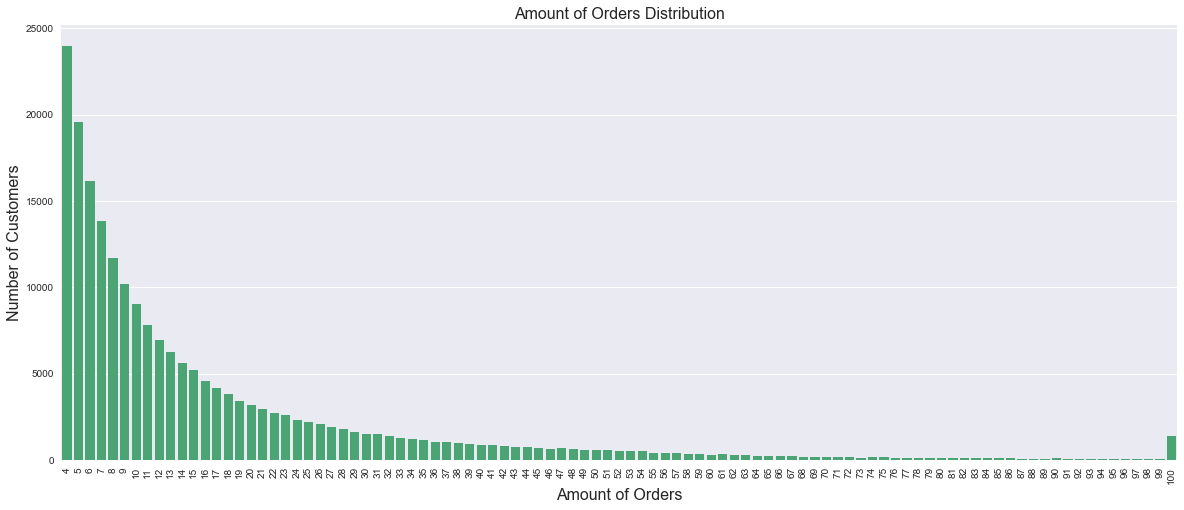

In [21]:
orders_amount_for_customer = orders.groupby('user_id')['order_number'].count().value_counts()

plt.figure(figsize=(20,8))
sns.barplot(x=orders_amount_for_customer.index, y=orders_amount_for_customer.values, color='mediumseagreen')
plt.title('Amount of Orders Distribution', fontsize=16)
plt.ylabel('Number of Customers', fontsize=16)
plt.xlabel('Amount of Orders', fontsize=16)
plt.xticks(rotation='vertical');

The amount of orders for each customers are between 4 to 100, which match the description in the data dictionary



In [22]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [23]:
days = orders.order_dow.values.tolist()
def get_day():
    res = []
    for day in days:
        if day == 0:
            res.append('Sun')
        elif day == 1:
            res.append('Mon')
        elif day == 2:
            res.append('Tue')
        elif day == 3:
            res.append('Wed')
        elif day == 4:
            res.append("Thur")
        elif day == 5:
            res.append('Fri')
        elif day == 6:
            res.append('Sat')
    return res

In [24]:
z = orders.copy()


In [25]:
z['order_dayofweek'] = get_day()

In [26]:
z.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_dayofweek
0,2539329,1,prior,1,2,8,NaN,Tue
1,2398795,1,prior,2,3,7,15.0,Wed
2,473747,1,prior,3,3,12,21.0,Wed
3,2254736,1,prior,4,4,7,29.0,Thur
4,431534,1,prior,5,4,15,28.0,Thur


''

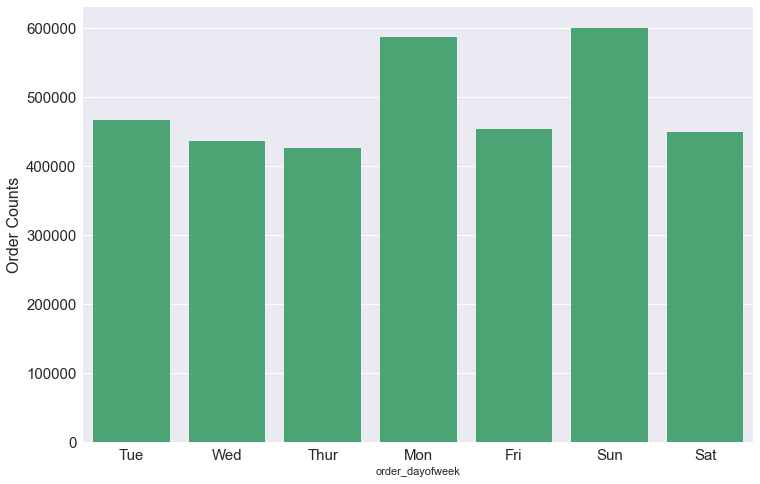

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x=z.order_dayofweek, color='mediumseagreen')

#plt.title("Order Amounts by Days", fontsize=16)
#plt.xlabel('Day of Week', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)
;

''

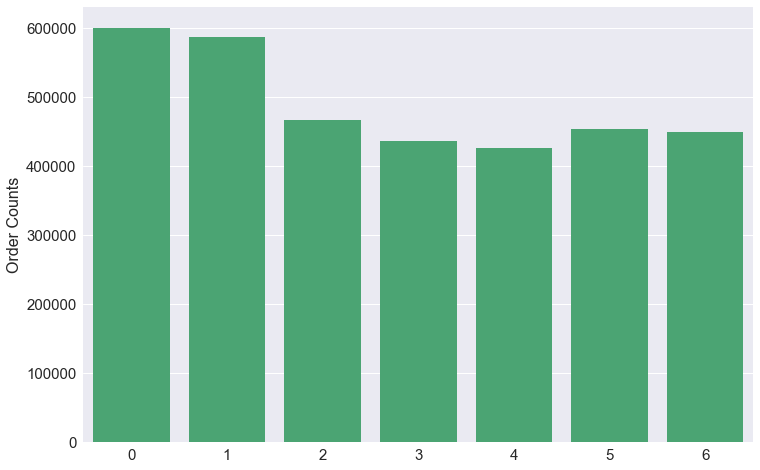

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x=orders.order_dow, color='mediumseagreen')

#plt.title("Order Amounts by Days", fontsize=16)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)
;

0 and 1 has the most orders in a week, while 4 has the least   
not sure which day of week is corresponding to a number, maybe 0 is Sun and 6 is Sat?    

''

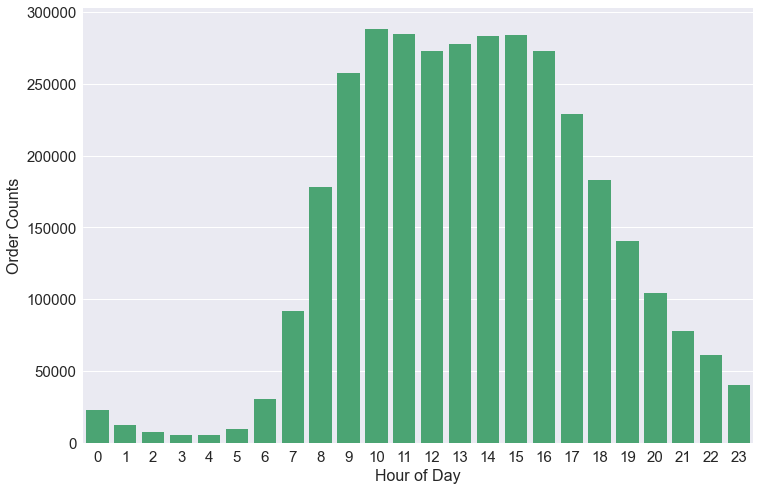

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(x=orders.order_hour_of_day, color='mediumseagreen')

#plt.title("Order Amounts by Hours", fontsize=16)
plt.xlabel('Hour of Day', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)
;

Looks like people like to order between 8am to 6pm, couldn't find the what the number corresponding to in data dictionary


''

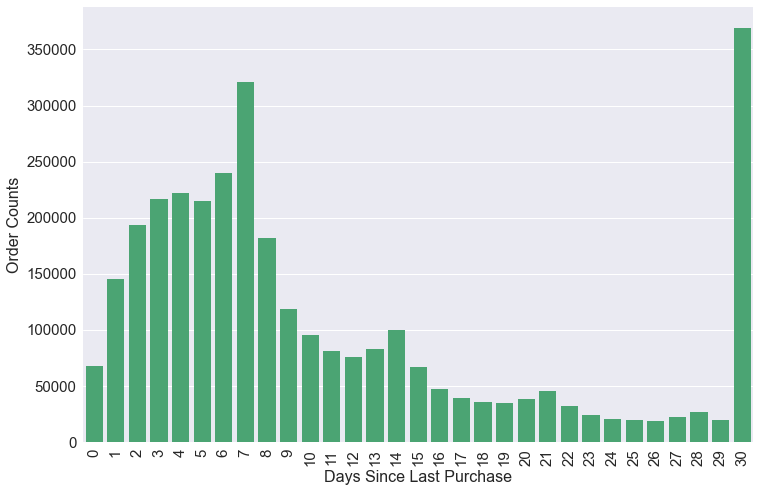

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x=orders.days_since_prior_order, color= 'mediumseagreen')

#plt.title("Number of Orders per Days Since Last Purchase", fontsize=16)
plt.xlabel('Days Since Last Purchase', fontsize=16)
plt.xticks(np.arange(31), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                          24, 25, 26, 27, 28, 29, 30],  fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)
;


looks like majority people order once a week, between 0 to 7.   
and there are people who order once more than 30 days.    

### Explore more on order_product_prior & order_product_train

In [31]:
order_products_prior.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [32]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [33]:
print(order_products_prior.shape)
print(order_products_train.shape)

(32434489, 4)
(1384617, 4)


In [34]:
order_products_total = pd.concat([order_products_prior, order_products_train])
print(order_products_total.shape)

(33819106, 4)


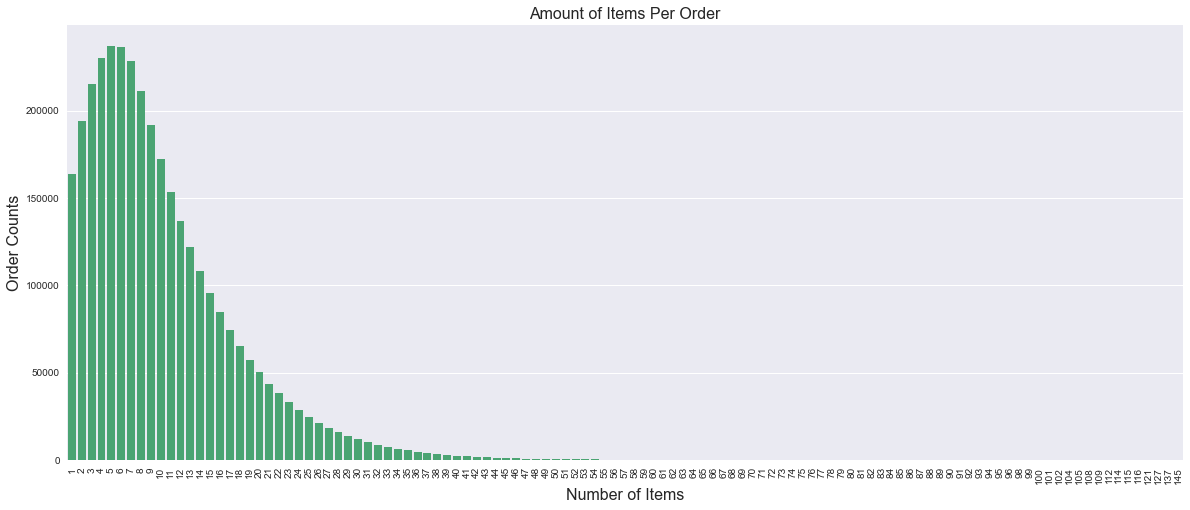

In [35]:
frequency_per_number_of_order = order_products_total.groupby('order_id')['product_id'].count().value_counts()

plt.figure(figsize=(20,8))
sns.barplot(x=frequency_per_number_of_order.index, y=frequency_per_number_of_order.values, color='mediumseagreen')
plt.title('Amount of Items Per Order', fontsize=16)
plt.ylabel('Order Counts', fontsize=16)
plt.xlabel('Number of Items', fontsize=16)
plt.xticks(rotation='vertical');

looks like people msotly purchase 4 items per order  
looks like majority people like to purchase between 3 to 8 items per order   

In [36]:

print('there are', order_products_total.shape[0], 'grocery products ordered')
print('there are', len(order_products_total.order_id.unique()), 'order transactions')
print('there are', len(order_products_total.product_id.unique()), 'unique products')

there are 33819106 grocery products ordered
there are 3346083 order transactions
there are 49685 unique products


In [37]:
print(len(order_products_total[order_products_total.reordered == 1])/order_products_total.shape[0], 'have reordered before')
print(len(order_products_total[order_products_total.reordered == 0])/order_products_total.shape[0], 'haven\'t reordered before')

0.5900617242809434 have reordered before
0.40993827571905656 haven't reordered before


In [38]:
print(len(order_products_total[order_products_total.reordered == 1]), 'products have reordered before')
print(len(order_products_total[order_products_total.reordered == 0]), 'products haven\'t reordered before')


19955360 products have reordered before
13863746 products haven't reordered before


### Explore more on aisles, departments & products

In [39]:
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [40]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [41]:
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [42]:
print(aisles.shape)
print(departments.shape)
print(products.shape)

(134, 2)
(21, 2)
(49688, 4)


In [43]:
products_departments = products.merge(departments, left_on='department_id', right_on='department_id', how='left')
products_departments_aisles = products_departments.merge(aisles, left_on='aisle_id', right_on='aisle_id', how='left')
products_departments_aisles.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [49]:
products_departments_aisles.groupby('department')['product_id'].count().reset_index().sort_values(by='product_id', ascending=False).head()

,department,product_id
17,personal care,6563
20,snacks,6264
16,pantry,5371
3,beverages,4365
10,frozen,4007


### Explore more on products_departments_aisles & order_products_total

In [50]:
order_products_total.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [51]:
products_departments_aisles.head()


,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [ ]:
df = order_products_total.merge(products_departments_aisles, left_on='product_id', right_on='product_id', how='left')
df.head()


In [53]:
df.shape


(33819106, 9)

In [54]:
top_15_products = df.product_name.value_counts(ascending=False).reset_index().head(15)
top_15_products.columns = ['product_name', 'count']
top_15_products

,product_name,count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


the top 15 items that people purchase the most are above.     
most of them are organic fruits/veggies. all of them are fruits/veggies.

In [55]:
top_15_aisles = df.aisle.value_counts(ascending=False).reset_index().head(15)
top_15_aisles.columns = ['aisle_name', 'count']
top_15_aisles

,aisle_name,count
0,fresh fruits,3792661
1,fresh vegetables,3568630
2,packaged vegetables fruits,1843806
3,yogurt,1507583
4,packaged cheese,1021462
5,milk,923659
6,water seltzer sparkling water,878150
7,chips pretzels,753739
8,soy lactosefree,664493
9,bread,608469


In [56]:
top_15_department = df.department.value_counts(ascending=False).reset_index().head(15)
top_15_department.columns = ['department_name', 'count']
top_15_department


,department_name,count
0,produce,9888378
1,dairy eggs,5631067
2,snacks,3006412
3,beverages,2804175
4,frozen,2336858
5,pantry,1956819
6,bakery,1225181
7,canned goods,1114857
8,deli,1095540
9,dry goods pasta,905340


In [57]:
df.groupby('department')

In [58]:
reorder_ratio_per_dep = df.groupby('department')['reordered'].mean().reset_index()
reorder_ratio_per_dep.columns = ['department', 'reorder_ratio']
reorder_ratio_per_dep.sort_values(by='reorder_ratio', ascending=False)

,department,reorder_ratio
7,dairy eggs,0.670161
3,beverages,0.653651
19,produce,0.650521
2,bakery,0.628381
8,deli,0.608130
18,pets,0.602557
1,babies,0.577680
5,bulk,0.577090
20,snacks,0.574464
0,alcohol,0.571221


''

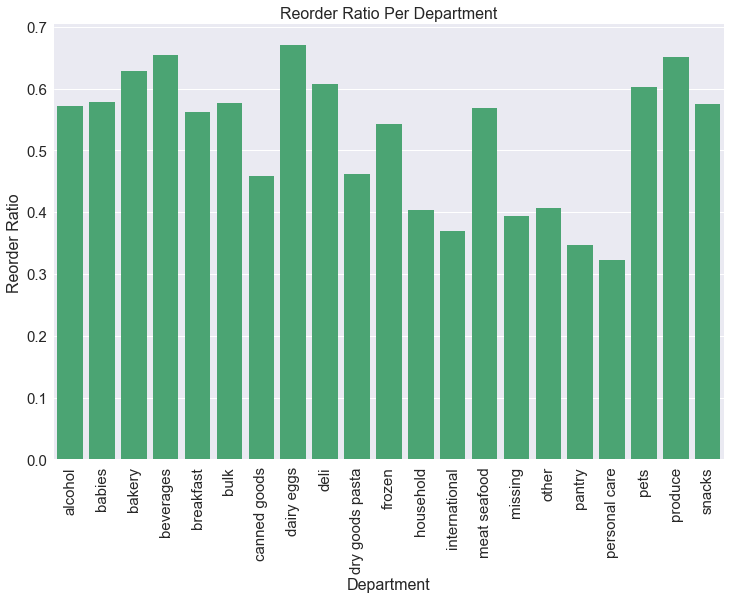

In [59]:
plt.figure(figsize=(12,8))
sns.barplot(x=reorder_ratio_per_dep.department, y=reorder_ratio_per_dep.reorder_ratio, color='mediumseagreen')
plt.title('Reorder Ratio Per Department', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.xticks(fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Reorder Ratio', fontsize=16)
plt.yticks(fontsize=15)
;

dairy eggs has the most reorder ratio    
personal care has the least reorder ratio

In [60]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


In [61]:
reorder_ratio_per_aisle = df.groupby('aisle')['reordered'].mean().reset_index()
reorder_ratio_per_aisle.columns = ['aisle', 'reorder_ratio']
reorder_ratio_per_aisle.sort_values(by='reorder_ratio', ascending=False)

,aisle,reorder_ratio
83,milk,0.781812
131,water seltzer sparkling water,0.729930
50,fresh fruits,0.718823
41,eggs,0.706359
119,soy lactosefree,0.692361
...,...,...
8,beauty,0.212858
47,first aid,0.195864
76,kitchen supplies,0.194802
7,baking supplies decor,0.167595


milk aisle has the highest reorder ratio    
spices seasonings has the least reorder ratio

In [62]:
top_15_reorder_items = df.groupby('product_name')['reordered'].sum().reset_index().sort_values(by='reordered', ascending=False).head(15)
top_15_reorder_items

,product_name,reordered
3677,Banana,415166
3472,Bag of Organic Bananas,329275
31923,Organic Strawberries,214448
28843,Organic Baby Spinach,194939
30300,Organic Hass Avocado,176173
28807,Organic Avocado,140270
32481,Organic Whole Milk,118684
22415,Large Lemon,112178
31366,Organic Raspberries,109688
42908,Strawberries,104588


In [63]:
df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


In [64]:
add_to_cart_order_reordered_ratio = df.groupby('add_to_cart_order')['reordered'].mean().reset_index()
add_to_cart_order_reordered_ratio.head()

,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598
